# Fit plot Tc

In [1]:
import sys
sys.path.append('C:\\Users\\MHJGuillermo\\PycharmProjects\\Doctorado\\Ising\\Varios_vecinos\\venv\\src')

In [2]:
%pylab inline

from pathlib import Path

import h5py
import numpy as np
import style
from ising.io import read_ising_config
from matplotlib import pyplot, rcParams
from matplotlib.axes import Axes, GridSpec
from matplotlib.figure import Figure
from ruamel.yaml import YAML
from scipy import interpolate as interp
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter
import pandas as pd
import json

import os
import re

yaml = YAML()

Populating the interactive namespace from numpy and matplotlib


## Model
El modelo a utilizar es:
$$ \frac{1}{T_c} = \frac{a_1}{log(a_2 p)} $$ 

In [22]:
from scipy.special import zeta
def model_function(x: float,a1: float,a2: float,a3: float):
    return a1*(np.sqrt(-np.log(a2-a3*x)))

def get_extrapol_function(model_function,a1,a2,a3):
    def extrapol_funct(x):
        return model_function(x,a1,a2,a3)
    return extrapol_funct

### Read files

In [23]:
# read data
data_path = Path("../../../data/Extrapolation").resolve()
file_one = 'inv_Tc_vs_inv_nv_sqrt_and_log_4_parms_extrapol_values.csv'
df_e_v = pd.read_csv(os.path.join(data_path,file_one),index_col=0)
# dataframe to keep params
df_params = pd.DataFrame(index=["a1","a2","a3"])

[0.         0.1338497  0.17472287 0.21654523 0.2623363  0.30888695
 0.35564198 0.40296176 0.4501864  0.49918823 0.54786208]


C:\Users\MHJGuillermo\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\MHJGuillermo\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until


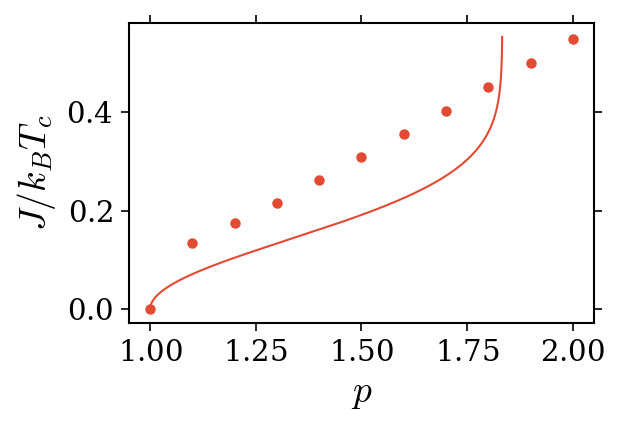

In [27]:
file_name_base = 'inv_Tc_vs_p_inv_log_3_parms'
# data 
x_data = np.arange(1,2.1,0.1)
y_data = df_e_v.loc['infty'].values
y_data[0] = 0
print(y_data)
# fit 
(a1,a2,a3), _= curve_fit(f=model_function,xdata=x_data,ydata=y_data,maxfev=10000,p0=[0.2,2.2,1.2],
#                                bounds=([-2], [2])
                           )
df_params["sqrt_log"] = [a1,a2,a3]
extrapol_funct = get_extrapol_function(model_function, a1,a2,a3)

# define the point for graph
x_extrapol = np.linspace(1, 2, 2048)
y_extrapol = extrapol_funct(x_extrapol)

# Load the default style.
style.use("default")
rcParams["text.usetex"] = False

fig1: Figure = pyplot.figure(figsize=(4, 9), dpi=150)
grid_spec = GridSpec(3, 1)

# Specific heat subplot.
ax: Axes = fig1.add_subplot(grid_spec[0, 0])

ax.plot(x_data, y_data, marker="o", lw=0,color='C0')
ax.plot(x_extrapol, y_extrapol, lw=1)

# # ticks configuration
# ax.xaxis.set_major_locator(plt.MultipleLocator(0.2))
# ax.xaxis.set_minor_locator(plt.MultipleLocator(0.1))
# for tick in ax.xaxis.get_major_ticks():
#     tick.label.set_fontsize(14) 

# ax.yaxis.set_major_locator(plt.MultipleLocator(0.1))
# ax.yaxis.set_minor_locator(plt.MultipleLocator(0.05))
# for tick in ax.yaxis.get_major_ticks():
#     tick.label.set_fontsize(14)

ax.set_xlabel(r"$p$")
ax.set_ylabel(r"$J/k_BT_c$")
# add text
# ax.text(1, 0.4, r"$\frac{J}{k_BT} = a_1 \frac{1}{\ln{(a_2p)}}$")

pyplot.draw()
pyplot.show()

In [24]:
# Define tha path and name for the csv files
file_params = os.path.join(data_path,file_name_base+'_params_curves.csv')
print(df_params)
print("Exporting to csv files the params adjusted {}".format(file_params))

    sqrt_log
a1  0.322158
a2  1.090309
Exporting to csv files the params adjusted C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\Varios_vecinos\venv\data\Extrapolation\inv_Tc_vs_p_inv_log_zeta_2_parms_params_curves.csv
